## Notebook 2: Pre-processing of images + exploratory data analysis

### 2.1: Splitting Google images into training, validation and test sets

For the 16,800 images scraped from Google (i.e. 1400 images per hawker food class for 12 classes), we first have to split them into their respectiva training, validation and test sets prior to modeling. The reason for having the validation and test sets is that the former will be used in our evaluation re hyperparameters tuning while the latter will only be used in the final evaluation of accuracy for our models. In so doing, we ensure that there is no data leakage as our models' accuracies are eventually evaluated against an unseen dataset (i.e. our test set).

In [1]:
#Importing the necessary libraries 
import os
import random
import glob
from shutil import copyfile
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.image import imread
import pathlib

In [2]:
#Setting out the 12 classes of hawker food 
image_folder = ['Bak Chor Mee', 'Char Kway Teow', 'Chicken Rice', 
                'Hokkien Prawn Mee','Kaya Toast and Egg', 'Laksa',
                'Nasi Lemak', 'Oyster Omelette', 'Roast Meat Rice',
                'Roti Prata', 'Satay', 'Wanton Mee']
nimgs = {}

#Getting the number of images for each of the 12 hawker food classes
for i in image_folder:
    nimages = len(os.listdir('../Datasets/Google Images/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(15, 10))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.xticks(rotation=90)
plt.title('Distribution of Different Hawker Food Classes')
plt.show()


As a sanity check, the graph shows that we have 16,800 images in total to be split into our training, validation and test sets (i.e. 1,400 images per class for 12 hawker food classes).

In [4]:
# Creating the corresponding folders to store our training,validation and test sets
os.mkdir('../Datasets/Final/Training')
os.mkdir('../Datasets/Final/Test')
os.mkdir('../Datasets/Final/Validation')
         

image_folder = ['Bak Chor Mee', 'Char Kway Teow', 'Chicken Rice', 
                'Hokkien Prawn Mee','Kaya Toast and Egg', 'Laksa',
                'Nasi Lemak', 'Oyster Omelette', 'Roast Meat Rice',
                'Roti Prata', 'Satay', 'Wanton Mee']

for i in image_folder:
    try:
        os.mkdir('../Datasets/Final/Training/'+i+'/')
        os.mkdir('../Datasets/Final/Test/'+i+'/')
        os.mkdir('../Datasets/Final/Validation/'+i+'/')
    except OSError:
        pass

In [5]:
#Defining a function to split each hawker class in to its training, test and validation sets

def split_data(SOURCE, TRAINING, TEST , VALIDATION, SPLIT_SIZE):
    files = []
    for filename in os.listdir(SOURCE):
        file = SOURCE + filename
        if os.path.getsize(file) > 0:
            files.append(filename)
        else:
            print(filename + " is zero length, so ignoring.")
    
    #We will split the 1400 images (for each class) into 1000 training images, 
    #200 validation images and 200 test images
    training_length = int(len(files) * SPLIT_SIZE)
    test_length = int(len(files)*(6/7))
    shuffled_set = random.sample(files, len(files))
    training_set = shuffled_set[0:training_length]
    test_set = shuffled_set[training_length:test_length]
    valid_set = shuffled_set[test_length:]

    for filename in training_set:
        this_file = SOURCE + filename
        destination = TRAINING + filename
        copyfile(this_file, destination)
        
    for filename in test_set:
        this_file = SOURCE + filename
        destination = TEST + filename
        copyfile(this_file, destination)

    for filename in valid_set:
        this_file = SOURCE + filename
        destination = VALIDATION + filename
        copyfile(this_file, destination)

In [6]:
#Setting out the directories for the images

BAK_CHOR_MEE_SOURCE_DIR = '../Datasets/Google Images/Bak Chor Mee/'
TRAINING_BAK_CHOR_MEE_DIR = '../Datasets/Final/Training/Bak Chor Mee/'
TEST_BAK_CHOR_MEE_DIR= '../Datasets/Final/Test/Bak Chor Mee/'
VALID_BAK_CHOR_MEE_DIR = '../Datasets/Final/Validation/Bak Chor Mee/'

CHAR_KWAY_TEOW_CAKE_SOURCE_DIR = '../Datasets/Google Images/Char Kway Teow/'
TRAINING_CHAR_KWAY_TEOW_DIR = '../Datasets/Final/Training/Char Kway Teow/'
TEST_CHAR_KWAY_TEOW_DIR= '../Datasets/Final/Test/Char Kway Teow/'
VALID_CHAR_KWAY_TEOW_DIR = '../Datasets/Final/Validation/Char Kway Teow/'

CHICKEN_RICE_SOURCE_DIR = '../Datasets/Google Images/Chicken Rice/'
TRAINING_CHICKEN_RICE_DIR = '../Datasets/Final/Training/Chicken Rice/'
TEST_CHICKEN_RICE_DIR= '../Datasets/Final/Test/Chicken Rice/'
VALID_CHICKEN_RICE_DIR = '../Datasets/Final/Validation/Chicken Rice/'

HOKKIEN_PRAWN_MEE_SOURCE_DIR = '../Datasets/Google Images/Hokkien Prawn Mee/'
TRAINING_HOKKIEN_PRAWN_MEE_DIR = '../Datasets/Final/Training/Hokkien Prawn Mee/'
TEST_HOKKIEN_PRAWN_MEE_DIR= '../Datasets/Final/Test/Hokkien Prawn Mee/'
VALID_HOKKIEN_PRAWN_MEE_DIR = '../Datasets/Final/Validation/Hokkien Prawn Mee/'

KAYA_TOAST_EGG_SOURCE_DIR = '../Datasets/Google Images/Kaya Toast and Egg/'
TRAINING_KAYA_TOAST_EGG_DIR = '../Datasets/Final/Training/Kaya Toast and Egg/'
TEST_KAYA_TOAST_EGG_DIR= '../Datasets/Final/Test/Kaya Toast and Egg/'
VALID_KAYA_TOAST_EGG_DIR = '../Datasets/Final/Validation/Kaya Toast and Egg/'

LAKSA_SOURCE_DIR = '../Datasets/Google Images/Laksa/'
TRAINING_LAKSA_DIR = '../Datasets/Final/Training/Training/Laksa/'
TEST_LAKSA_DIR= '../Datasets/Final/Test/Laksa/'
VALID_LAKSA_DIR = '../Datasets/Final/Validation/Laksa/'

NASI_LEMAK_SOURCE_DIR = '../Datasets/Google Images/Nasi Lemak/'
TRAINING_NASI_LEMAK_DIR = '../Datasets/Final/Training/Nasi Lemak/'
TEST_NASI_LEMAK_DIR= '../Datasets/Final/Test/Nasi Lemak/'
VALID_NASI_LEMAK_DIR = '../Datasets/Final/Validation/Nasi Lemak/'

OYSTER_OMELETTE_SOURCE_DIR = '../Datasets/Google Images/Oyster Omelette/'
TRAINING_OYSTER_OMELETTE_DIR = '../Datasets/Final/Training/Oyster Omelette/'
TEST_OYSTER_OMELETTE_DIR= '../Datasets/Final/Test/Oyster Omelette/'
VALID_OYSTER_OMELETTE_DIR = '../Datasets/Final/Validation/Oyster Omelette/'

ROAST_MEAT_RICE_DIR = '../Datasets/Google Images/Roast Meat Rice/'
TRAINING_ROAST_MEAT_RICE_DIR = '../Datasets/Final/Training/Roast Meat Rice/'
TEST_ROAST_MEAT_RICE_DIR= '../Datasets/Final/Test/Roast Meat Rice/'
VALID_ROAST_MEAT_RICE_DIR = '../Datasets/Final/Validation/Roast Meat Rice/'

ROTI_PRATA_DIR = '../Datasets/Google Images/Roti Prata/'
TRAINING_ROTI_PRATA_DIR = '../Datasets/Final/Training/Roti Prata/'
TEST_ROTI_PRATA_DIR= '../Datasets/Final/Test/Roti Prata/'
VALID_ROTI_PRATA_DIR = '../Datasets/Final/Validation/Roti Prata/'

SATAY_DIR = '../Datasets/Google Images/Satay/'
TRAINING_SATAY_DIR = '../Datasets/Final/Training/Satay/'
TEST_SATAY_DIR= '../Datasets/Final/Test/Satay/'
VALID_SATAY_DIR = '../Datasets/Final/Validation/Satay/'

WANTON_MEE_DIR = '../Datasets/Google Images/Wanton Mee/'
TRAINING_WANTON_MEE_DIR = '../Datasets/Final/Training/Wanton Mee/'
TEST_WANTON_MEE_DIR= '../Datasets/Final/Test/Wanton Mee/'
VALID_WANTON_MEE_DIR = '../Datasets/Final/Validation/Wanton Mee/'


In [7]:
#Running the functions we defined earlier

split_data(BAK_CHOR_MEE_SOURCE_DIR, TRAINING_BAK_CHOR_MEE_DIR,TEST_BAK_CHOR_MEE_DIR,
           VALID_BAK_CHOR_MEE_DIR, SPLIT_SIZE=(5/7))

split_data(CHAR_KWAY_TEOW_CAKE_SOURCE_DIR, TRAINING_CHAR_KWAY_TEOW_DIR,TEST_CHAR_KWAY_TEOW_DIR,
           VALID_CHAR_KWAY_TEOW_DIR, SPLIT_SIZE=(5/7))

split_data(CHICKEN_RICE_SOURCE_DIR, TRAINING_CHICKEN_RICE_DIR,TEST_CHICKEN_RICE_DIR,
           VALID_CHICKEN_RICE_DIR, SPLIT_SIZE=(5/7))

split_data(HOKKIEN_PRAWN_MEE_SOURCE_DIR, TRAINING_HOKKIEN_PRAWN_MEE_DIR,TEST_HOKKIEN_PRAWN_MEE_DIR,
           VALID_HOKKIEN_PRAWN_MEE_DIR, SPLIT_SIZE=(5/7))

split_data(KAYA_TOAST_EGG_SOURCE_DIR, TRAINING_KAYA_TOAST_EGG_DIR,TEST_KAYA_TOAST_EGG_DIR,
           VALID_KAYA_TOAST_EGG_DIR, SPLIT_SIZE=(5/7))

split_data(LAKSA_SOURCE_DIR, TRAINING_LAKSA_DIR,TEST_LAKSA_DIR,
           VALID_LAKSA_DIR, SPLIT_SIZE=(5/7))

split_data(NASI_LEMAK_SOURCE_DIR, TRAINING_NASI_LEMAK_DIR,TEST_NASI_LEMAK_DIR,
           VALID_NASI_LEMAK_DIR, SSPLIT_SIZE=(5/7))

split_data(OYSTER_OMELETTE_SOURCE_DIR, TRAINING_OYSTER_OMELETTE_DIR, TEST_OYSTER_OMELETTE_DIR,
           VALID_OYSTER_OMELETTE_DIR, SPLIT_SIZE=(5/7))

split_data(ROAST_MEAT_RICE_DIR, TRAINING_ROAST_MEAT_RICE_DIR, TEST_ROAST_MEAT_RICE_DIR,
           VALID_ROAST_MEAT_RICE_DIR , SSPLIT_SIZE=(5/7))

split_data(ROTI_PRATA_DIR, TRAINING_ROTI_PRATA_DIR, TEST_ROTI_PRATA_DIR,
           VALID_ROTI_PRATA_DIR  , SPLIT_SIZE=(5/7))

split_data(SATAY_DIR, TRAINING_SATAY_DIR, TEST_SATAY_DIR,
           VALID_SATAY_DIR ,SPLIT_SIZE=(5/7))

split_data(WANTON_MEE_DIR, TRAINING_WANTON_MEE_DIR, TEST_WANTON_MEE_DIR,
           VALID_WANTON_MEE_DIR, SPLIT_SIZE=(5/7))


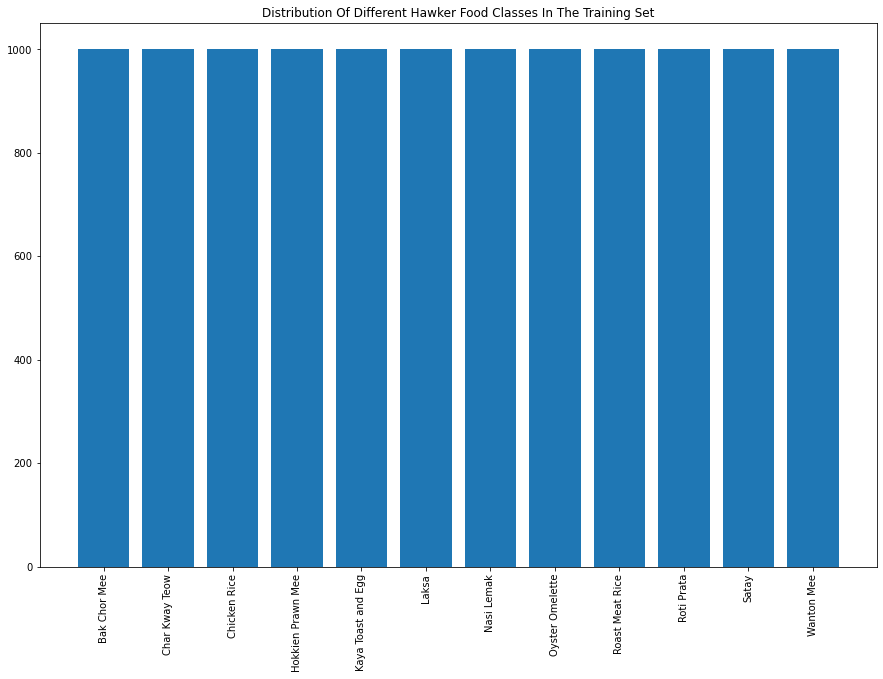

In [3]:
image_folder = ['Bak Chor Mee', 'Char Kway Teow', 'Chicken Rice', 
                'Hokkien Prawn Mee','Kaya Toast and Egg', 'Laksa',
                'Nasi Lemak', 'Oyster Omelette', 'Roast Meat Rice',
                'Roti Prata', 'Satay', 'Wanton Mee']
nimgs = {}

for i in image_folder:
    nimages = len(os.listdir('../Datasets/Final/Training/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(15, 10))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.xticks(rotation=90)
plt.title('Distribution Of Different Hawker Food Classes In The Training Set')
plt.show()

As a sanity check, the graph shows that we have 12,000 training images in total (i.e. 1,000 images per class for 12 hawker food classes).

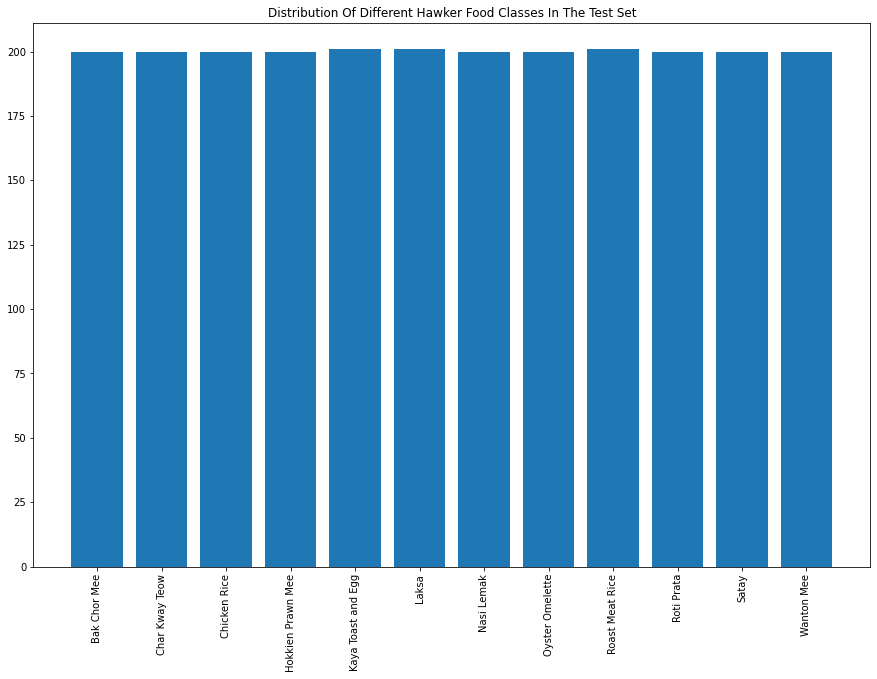

In [4]:
image_folder = ['Bak Chor Mee', 'Char Kway Teow', 'Chicken Rice', 
                'Hokkien Prawn Mee','Kaya Toast and Egg', 'Laksa',
                'Nasi Lemak', 'Oyster Omelette', 'Roast Meat Rice',
                'Roti Prata', 'Satay', 'Wanton Mee']
nimgs = {}

for i in image_folder:
    nimages = len(os.listdir('../Datasets/Final/Test/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(15, 10))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.xticks(rotation=90)
plt.title('Distribution Of Different Hawker Food Classes In The Test Set')
plt.show()

As a sanity check, the graph shows that we have 2,400 test images in total (i.e. 200 images per class for 12 hawker food classes).

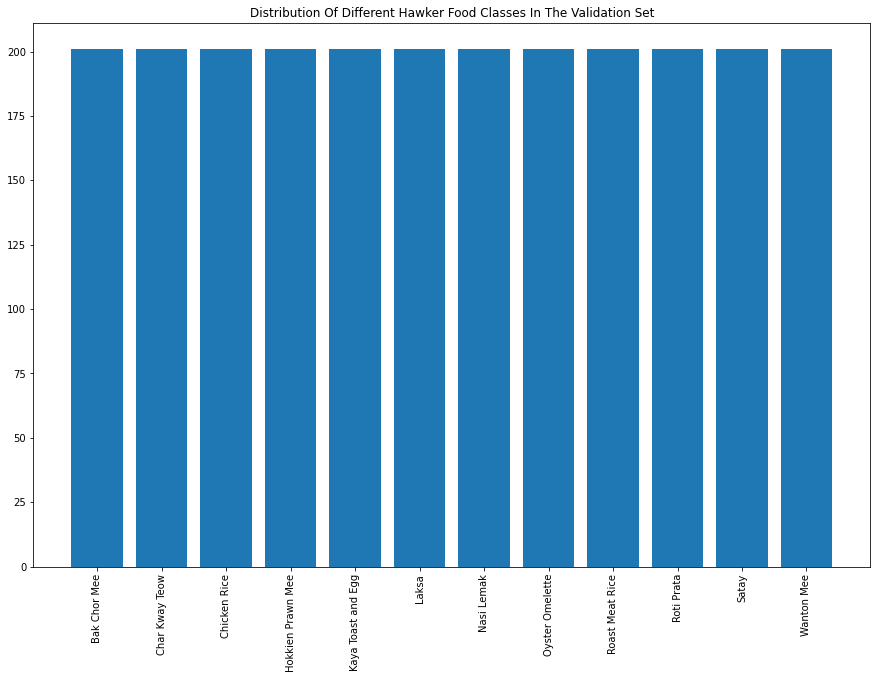

In [5]:
image_folder = ['Bak Chor Mee', 'Char Kway Teow', 'Chicken Rice', 
                'Hokkien Prawn Mee','Kaya Toast and Egg', 'Laksa',
                'Nasi Lemak', 'Oyster Omelette', 'Roast Meat Rice',
                'Roti Prata', 'Satay', 'Wanton Mee']
nimgs = {}

for i in image_folder:
    nimages = len(os.listdir('../Datasets/Final/Validation/'+i+'/'))
    nimgs[i]=nimages
plt.figure(figsize=(15, 10))
plt.bar(range(len(nimgs)), list(nimgs.values()), align='center')
plt.xticks(range(len(nimgs)), list(nimgs.keys()))
plt.xticks(rotation=90)
plt.title('Distribution Of Different Hawker Food Classes In The Validation Set')
plt.show()

As a sanity check, the graph shows that we have 2,400 validation images in total (i.e. 200 images per class for 12 hawker food classes). 

### 2.2: Exploratory data analysis

As a sanity check to ensure the integrity of our images, we did some exploratory data analysis as follows. 

#### 2.2.1: Printing random images as  a sanity check

In [6]:
#Setting out the paths of the images

bak_chor_mee = glob.glob('../Datasets/Final/Training/Bak Chor Mee/*.jpg')
char_kway_teow = glob.glob('../Datasets/Final/Training/Char Kway Teow/*.jpg')
chicken_rice = glob.glob('../Datasets/Final/Training/Chicken Rice/*.jpg')
hokkien_prawn_mee = glob.glob('../Datasets/Final/Training/Hokkien Prawn Mee/*.jpg')
kaya_toast_and_egg = glob.glob('../Datasets/Final/Training/Kaya Toast and Egg/*.jpg')
laksa = glob.glob('../Datasets/Final/Training/Laksa/*.jpg')
nasi_lemak = glob.glob('../Datasets/Final/Training/Nasi Lemak/*.jpg')
oyster_omelette = glob.glob('../Datasets/Final/Training/Oyster Omelette/*.jpg')
roast_meat_rice= glob.glob('../Datasets/Final/Training/Roast Meat Rice/*.jpg')
roti_prata = glob.glob('../Datasets/Final/Training/Roti Prata/*.jpg')
satay = glob.glob('../Datasets/Final/Training/Satay/*.jpg')
wanton_mee = glob.glob('../Datasets/Final/Training/Wanton Mee/*.jpg')

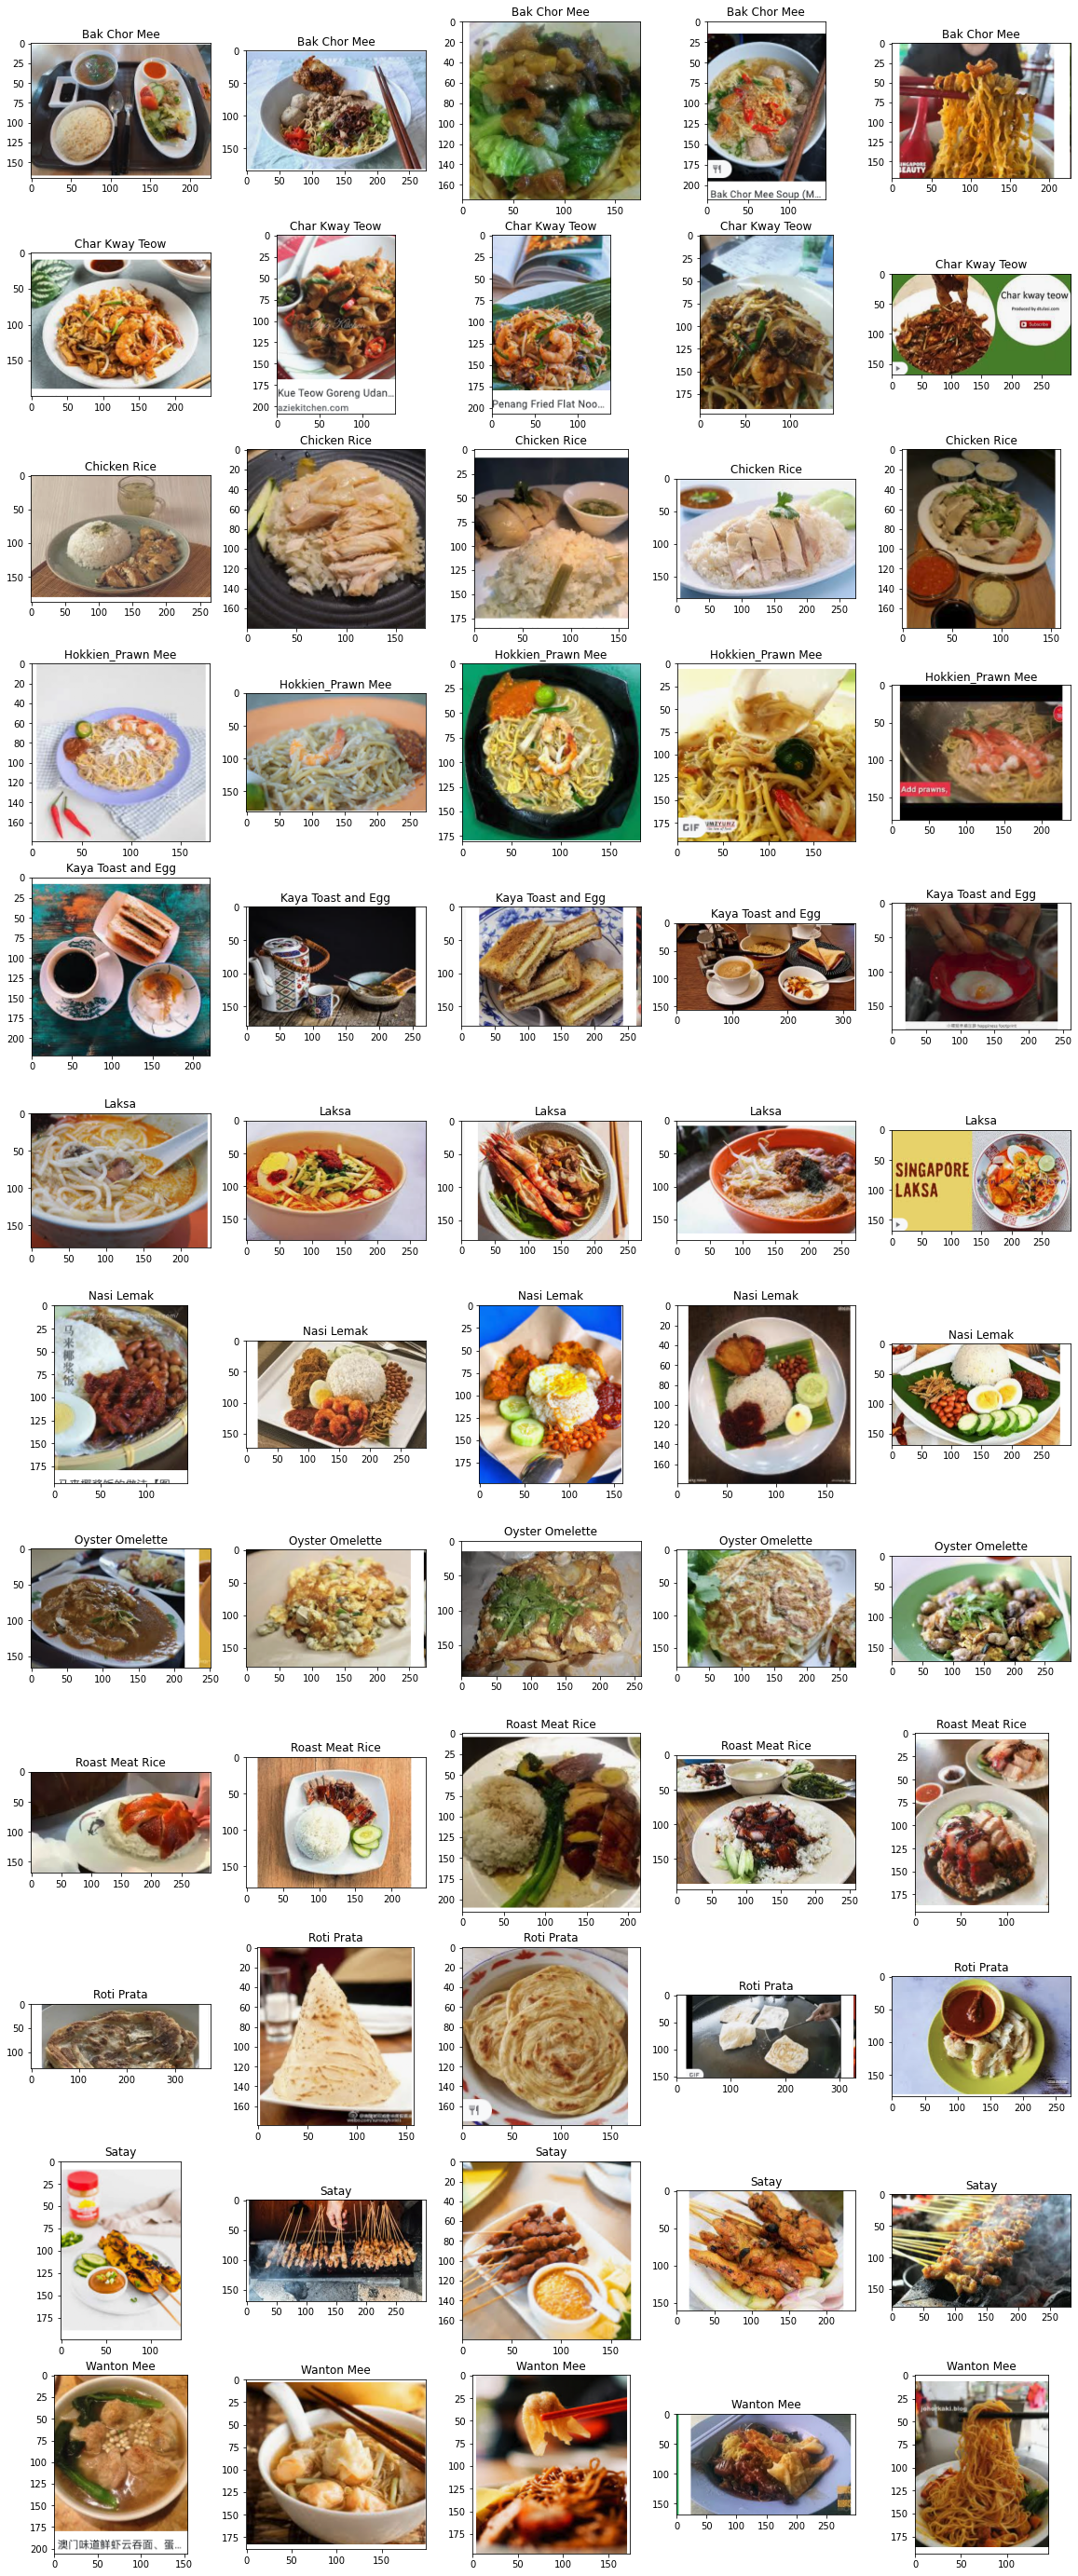

In [7]:
# Setting out a figure to return 5 images per hawker food classes from the training set

n = 5
fig, axes = plt.subplots(12,n,figsize=(20,50))

for i in range(n):
    axes[0, i].imshow(plt.imread(bak_chor_mee[i]))
    axes[0, i].set_title('Bak Chor Mee')
    axes[1, i].imshow(plt.imread(char_kway_teow[i]))
    axes[1, i].set_title('Char Kway Teow')
    axes[2, i].imshow(plt.imread(chicken_rice[i]))
    axes[2, i].set_title('Chicken Rice')
    axes[3, i].imshow(plt.imread(hokkien_prawn_mee[i]))
    axes[3, i].set_title('Hokkien_Prawn Mee')
    axes[4,i].imshow(plt.imread(kaya_toast_and_egg[i]))
    axes[4,i].set_title('Kaya Toast and Egg')
    axes[5,i].imshow(plt.imread(laksa[i]))
    axes[5,i].set_title('Laksa')
    axes[6,i].imshow(plt.imread(nasi_lemak[i]))
    axes[6,i].set_title('Nasi Lemak')
    axes[7,i].imshow(plt.imread(oyster_omelette[i]))
    axes[7,i].set_title('Oyster Omelette')
    axes[8,i].imshow(plt.imread(roast_meat_rice[i]))
    axes[8,i].set_title('Roast Meat Rice')
    axes[9,i].imshow(plt.imread(roti_prata[i]))
    axes[9,i].set_title('Roti Prata')
    axes[10,i].imshow(plt.imread(satay[i]))
    axes[10,i].set_title('Satay')
    axes[11,i].imshow(plt.imread(wanton_mee[i]))
    axes[11,i].set_title('Wanton Mee')
    

#### 2.2.2: Printing a scatterplot of the image sizes of all our images

In [9]:
for i in range(len(bak_chor_mee)):
    h1,w1,c1 = plt.imread(bak_chor_mee[i]).shape
    h2,w2,c2 = plt.imread(char_kway_teow[i]).shape
    h3,w3,c3 = plt.imread(chicken_rice[i]).shape
    h4,w4,c4 = plt.imread(hokkien_prawn_mee[i]).shape
    h5,w5,c5 = plt.imread(kaya_toast_and_egg[i]).shape
    h6,w6,c6 = plt.imread(laksa[i]).shape
    h7,w7,c7 = plt.imread(nasi_lemak[i]).shape
    h8,w8,c8 = plt.imread(oyster_omelette[i]).shape
    h9,w9,c9 = plt.imread(roast_meat_rice[i]).shape
    h10,w10,c10 =plt.imread(roti_prata[i]).shape
    h11,w11,c11=plt.imread(satay[i]).shape
    h12,w12,c12 =plt.imread(wanton_mee[i]).shape
    plt.scatter(h1,w1)
    plt.scatter(h2,w2)
    plt.scatter(h3,w3)
    plt.scatter(h4,w4)
    plt.scatter(h5,w5)
    plt.scatter(h6,w6)
    plt.scatter(h7,w7)
    plt.scatter(h8,w8)
    plt.scatter(h9,w9)
    plt.scatter(h10,w10)
    plt.scatter(h11,w11)
    plt.scatter(h12,w12)
plt.title('Image Size')

Text(0.5, 1.0, 'Image Size')

As evident from the image above, we have images of varying sizes (i.e. height and weight). That said, we will predominantly work with 224 x 224 as there is a typical image size for some of the pre-trained models used in transfer learning.